Importing the Dependencies 

In [56]:
import pandas as pd
import numpy as np
import category_encoders as ce
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

Data Collection and Processing 

In [2]:
# Loading the data from cvs file to pandas dataframe 
df =pd.read_csv("Car details v3.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
#cheacking the number of rows and columns 
df.shape 

(8128, 13)

In [5]:
#Getting some Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
#Cheacking the numbur of missing values 
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

Fixing Name

In [7]:
#Finding Unique Values
df["name"].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [8]:
#representing the "name" column by taking only the first two words from each entry
def get_2car(car):
    try:
        x=car.split(" ")[0:2]
        return " ".join(x)
    except:
        np.nan

        
df["name"]=df["name"].apply(get_2car)

In [9]:
df["name"]

0        Maruti Swift
1         Skoda Rapid
2          Honda City
3         Hyundai i20
4        Maruti Swift
            ...      
8123      Hyundai i20
8124    Hyundai Verna
8125     Maruti Swift
8126      Tata Indigo
8127      Tata Indigo
Name: name, Length: 8128, dtype: object

In [10]:
#Cheacking fuel
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [11]:
#cheacking the distribution of categorical data 
df["fuel"].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [12]:
#Cheacking seller_type 
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [13]:
df["seller_type"].value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

In [14]:
#Cheacking transmission
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [15]:
df["transmission"].value_counts()

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

In [16]:
#Cheacking owner
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [17]:
df["owner"].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [18]:
#drop Test Drive Car becaus it is just 5
df.drop(df[df["owner"]=="Test Drive Car"].index,inplace=True)

In [19]:
df["owner"].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Name: count, dtype: int64

Fixing mileage

In [20]:
def fix_Mileage(mileage):
    try:
        if mileage.endswith("kmpl"):
            return mileage[:-4].strip()
        elif mileage.endswith("km/kg"):  
            return mileage[:-5].strip()
        else:
            return np.nan
    except:
        return np.nan
df["mileage"]=df["mileage"].apply(fix_Mileage)

df["mileage"]=pd.to_numeric(df["mileage"])

In [21]:
# Cheacking the missing values in mileage
df["mileage"].isna().sum()

221

In [22]:
#filling the missing values 
df["mileage"].fillna(df["mileage"].mean(),inplace= True)

In [23]:
df["mileage"].isna().sum()

0

Fixing engine

In [24]:
def fix_Engine(engine):
    try:
        return engine[:-2].strip()
    except:
        return np.nan

df["engine"]=df["engine"].apply(fix_Engine)

df["engine"]=pd.to_numeric(df["engine"])

In [25]:
# Cheacking the missing values in engine 
df["engine"].isna().sum()

221

In [26]:
#Replace the missing values with the median value of the "engine" column
df["engine"].fillna(df["engine"].median(),inplace= True)

In [27]:
df["engine"].isna().sum()

0

Fixing power

In [28]:
def fix_Power(max_power):
    try:
        return max_power[:-3].strip()
    except:
        return np.nan

df["max_power"]=df["max_power"].apply(fix_Power)
df["max_power"]=pd.to_numeric(df["max_power"])

In [29]:
#Replace the missing values with the mean value of the "max_power" column
df["max_power"].fillna(df["max_power"].mean(),inplace= True)

Fixing torque

In [30]:
# Function to extract the first number from strings
def extract_first_number(text):
    match = re.search(r'\d+(\.\d+)?', str(text))
    if match:
        return match.group()
    return None

# Apply function after converting column to string
df['torque'] = df['torque'].astype(str).apply(extract_first_number)
df["torque"]=pd.to_numeric(df["torque"])

In [31]:
#Replace the missing values with the mean value of the "torque" column
df['torque'].fillna(df['torque'].mean(),inplace=True)

In [32]:
#Cheacking seats
df.seats.unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [33]:
#Replace the missing values with the mode value of the "seats" column
df['seats'].fillna(df['seats'].mode()[0],inplace=True)

In [34]:
df.seats.unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [35]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0
2,Honda City,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7,5.0
3,Hyundai i20,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0
4,Maruti Swift,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7,5.0
8124,Hyundai Verna,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,24.0,5.0
8125,Maruti Swift,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190.0,5.0
8126,Tata Indigo,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140.0,5.0


In [36]:
#Handling outliers in specific columns of a DataFrame 

for column in df[["selling_price","km_driven","mileage","engine","max_power","torque","seats"]]:

    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1, q3 = np.percentile(df[column], [25, 75])

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Set the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the median value (Q2)
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.median(df[column]), df[column])

In [37]:
#Cheacking seller_type

df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

Splitting the Data into Training data and Test Data 

In [38]:
# Separate features and target variable
X=df.drop(['name',"selling_price"],axis=1)
y=df["selling_price"]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [40]:
X_train["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [41]:
#Encoding Categorical data
mapping = {
    'Fourth & Above Owner': 1,
    'Third Owner': 2,
    'Second Owner': 3,
    'First Owner': 4
}

X_train['owner'] = X_train['owner'].map(mapping)
X_test['owner'] = X_test['owner'].map(mapping)

In [42]:
mapping = {
    'Manual': 0,
    'Automatic' :1,
}
X_train['transmission'] = X_train['transmission'].map(mapping)
X_test['transmission'] = X_test['transmission'].map(mapping)

In [43]:
encoder = ce.OneHotEncoder(cols=["seller_type","fuel"])
x_train_encoding=encoder.fit_transform(X_train)
x_test_encoding=encoder.transform(X_test)

In [44]:
scaler = StandardScaler()

# Fit and transform the specified columns
x_train = scaler.fit_transform(x_train_encoding)
x_test = scaler.transform(x_test_encoding)

In [45]:

# Assuming x_train, x_test are arrays and x_train_encoding, x_test_encoding are DataFrames with columns
train_data = pd.DataFrame(x_train, columns=x_train_encoding.columns)
test_data = pd.DataFrame(x_test, columns=x_test_encoding.columns)

In [46]:
train_data

,year,km_driven,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_1,seller_type_2,seller_type_3,transmission,owner,mileage,engine,max_power,torque,seats
0,0.792561,-0.400133,0.915811,-0.892478,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,-0.385045,0.641861,1.254616,-0.109711,0.202793,0.630177,0.0
1,0.298503,0.612580,0.915811,-0.892478,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,-0.385045,0.641861,-1.678089,-0.109711,0.744727,0.630177,0.0
2,-0.195555,0.359402,-1.091928,1.120476,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,-0.385045,-0.771974,-0.015963,-0.298950,0.126654,-0.612217,0.0
3,1.039590,-1.159668,-1.091928,1.120476,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,-0.385045,0.641861,0.271862,-1.055907,-0.758354,-0.871617,0.0
4,-0.195555,1.372115,0.915811,-0.892478,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,-0.385045,-0.771974,1.021245,-0.109711,-0.446631,0.493650,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,0.051474,-0.703947,0.915811,-0.892478,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,-0.385045,0.641861,-1.434345,-0.109711,2.421137,2.268498,0.0
6494,-0.442584,0.764487,0.915811,-0.892478,-0.074639,-0.085356,-2.252309,2.505314,-0.167338,2.597101,-0.771974,0.041083,2.728874,-0.039061,0.084070,0.0
6495,0.545532,-0.779901,-1.091928,1.120476,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,-0.385045,0.641861,-0.223405,-0.302735,-0.095942,-0.534396,0.0
6496,1.286619,-0.762178,0.915811,-0.892478,-0.074639,-0.085356,-2.252309,2.505314,-0.167338,-0.385045,0.641861,2.317755,-0.109711,-0.445735,0.493650,0.0


In [47]:
test_data

,year,km_driven,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_1,seller_type_2,seller_type_3,transmission,owner,mileage,engine,max_power,torque,seats
0,-2.418816,1.118936,-1.091928,1.120476,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,-0.385045,-2.185808,-1.727356,0.817560,0.717854,-1.921508,0.0
1,0.545532,0.865758,0.915811,-0.892478,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,-0.385045,0.641861,2.027336,-0.870452,-0.670570,-0.188984,0.0
2,0.545532,0.106223,0.915811,-0.892478,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,-0.385045,0.641861,0.969384,-0.109711,-0.449318,0.493650,0.0
3,0.051474,0.359402,0.915811,-0.892478,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,-0.385045,0.641861,-0.117091,0.696447,1.096311,1.285505,0.0
4,-2.418816,1.118936,-1.091928,1.120476,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,-0.385045,-0.771974,-1.312473,1.218746,0.449127,-1.929700,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,0.051474,2.011162,0.915811,-0.892478,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,-0.385045,0.641861,-1.921833,-0.109711,1.613611,1.858918,0.0
1621,1.286619,-1.450823,0.915811,-0.892478,-0.074639,-0.085356,-2.252309,2.505314,-0.167338,2.597101,0.641861,-0.695334,2.717519,-0.039061,0.084070,0.0
1622,0.792561,-0.653312,-1.091928,1.120476,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,-0.385045,0.641861,0.370397,-0.302735,-0.097285,-0.557606,0.0
1623,0.792561,-1.286257,-1.091928,1.120476,-0.074639,-0.085356,0.443989,-0.399152,-0.167338,2.597101,0.641861,-0.635695,1.188468,1.671836,0.014441,0.0


Model Training

 1.Linear Regression  

In [48]:
#Loading the linear regression model
lin_reg_model= LinearRegression()

In [60]:
lin_reg_model.fit(train_data,y_train)

LinearRegression()

In [61]:
#prediction on Test data 
y_pred = lin_reg_model.predict(test_data)

In [62]:
# R squared Error
error_score = metrics.r2_score(y_test, y_pred)
print("R squered Error : ", error_score)

R squered Error :  0.5794354744626731


In [63]:
np.mean(y_test)

455817.10523076926

In [64]:
np.mean(y_pred)

452057.5209582426

In [65]:
mean_squared_error(y_test,y_pred)

26612001144.801365

Model Evaluation 

Visualizing the actual prices and predicted prices 

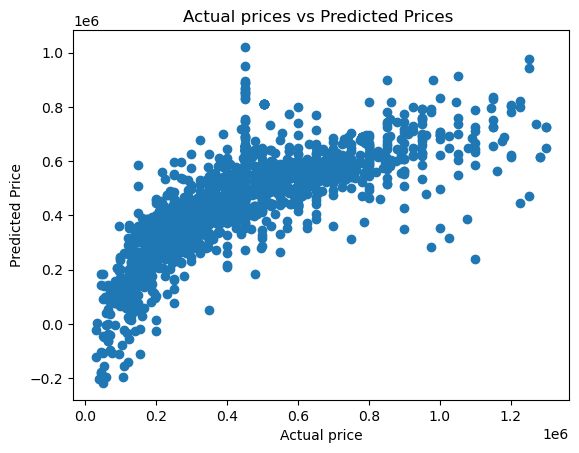

In [66]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted Prices ')
plt.show()

In [77]:
#fiting the model to reach more data to optinmize the score 
# Polynomial regression with degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(train_data)

# Transform the test data using the same PolynomialFeatures instance
X_test_poly = poly_features.transform(test_data)

# Fit a linear regression model to the polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)



LinearRegression()

In [78]:
prediction= lin_reg.predict(X_test_poly)

In [79]:
mean_squared_error(y_test,prediction)

18909790353.168846

In [80]:
error_score2 = metrics.r2_score(y_test, prediction)
print("R squered Error : ", error_score2)

R squered Error :  0.7011578736744362
